In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 625.9/625.9 kB 12.3 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/ultralytics/ultralytics
!cd ultralytics
!pip install -e ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 11761, done.
remote: Counting objects: 100% (1005/1005), done.
remote: Compressing objects: 100% (534/534), done.
remote: Total 11761 (delta 649), reused 731 (delta 464), pack-reused 10756
Receiving objects: 100% (11761/11761), 7.50 MiB | 9.08 MiB/s, done.
Resolving deltas: 100% (7830/7830), done.
Obtaining file:///content/ultralytics
  Preparing metadata (setup.py) ... done
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.128
    Uninstalling ultralytics-8.0.128:
      Successfully uninstalled ultralytics-8.0.128
  Running setup.py develop for ultralytics


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="uZhw7F5R18toDWxUZFkF")
project = rf.workspace("class-raify").project("project_customdataset")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.128, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Project_customDataset-1 in yolov8:: 100%|██████████| 1184/1184 [00:00<00:00, 2136.68it/s]


In [2]:
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data={dataset.location}/data.yaml \
epochs=100 \
imgsz=640

100% 21.5M/21.5M [00:00<00:00, 63.4MB/s]
Ultralytics YOLOv8.0.128 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Project_customDataset-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=to

In [3]:
!yolo task=detect \
mode=val \
model=/content/ultralytics/runs/detect/train/weights/best.pt \
data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.128 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/Project_customDataset-1/valid/labels.cache... 55 images, 0 backgrounds, 0 corrupt: 100% 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:06<00:00,  1.62s/it]
                   all         55        594      0.911      0.943      0.968      0.645
Speed: 20.7ms preprocess, 33.4ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to /content/ultralytics/runs/detect/val


In [4]:
!yolo task=detect \
mode=predict \
model=/content/ultralytics/runs/detect/train/weights/best.pt \
conf=0.25 \
source={dataset.location}/test/images

Ultralytics YOLOv8.0.128 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/54 /content/Project_customDataset-1/test/images/warning-219-_jpg.rf.88a9b10642568034f00465ac000b6322.jpg: 640x640 12 Warnings, 16.3ms
image 2/54 /content/Project_customDataset-1/test/images/warning-220-_jpg.rf.80ed1098d8e8c09dd4dbb2de657a3bd8.jpg: 640x640 12 Warnings, 16.3ms
image 3/54 /content/Project_customDataset-1/test/images/warning-221-_jpg.rf.bb3e1fc8d926e571b1676a9b156543b7.jpg: 640x640 9 Warnings, 16.2ms
image 4/54 /content/Project_customDataset-1/test/images/warning-222-_jpg.rf.2bcf345c7cc116a53a97f89cc9e16acb.jpg: 640x640 9 Warnings, 16.2ms
image 5/54 /content/Project_customDataset-1/test/images/warning-223-_jpg.rf.ace22bcd5d2f008b99c2e425d4198b72.jpg: 640x640 9 Warnings, 16.2ms
image 6/54 /content/Project_customDataset-1/test/images/warning-224-_jpg.rf.ba687cfe5fd9733caa370e270a69d778.jpg: 640x640 12 Warnings, 1


image 1/1 /content/asd.jpg: 640x480 12 Warnings, 13.3ms
Speed: 3.7ms preprocess, 13.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'Warning'}
orig_img: array([[[ 99,  86,  78],
        [ 99,  86,  78],
        [ 99,  86,  78],
        ...,
        [155, 145, 135],
        [156, 146, 136],
        [156, 146, 136]],

       [[ 99,  86,  78],
        [ 99,  86,  78],
        [ 99,  86,  78],
        ...,
        [141, 131, 121],
        [142, 132, 122],
        [142, 132, 122]],

       [[ 97,  86,  78],
        [ 97,  86,  78],
        [ 97,  86,  78],
        ...,
        [128, 118, 108],
        [128, 118, 108],
        [128, 118, 108]],

       ...,

       [[ 76, 110, 140],
        [ 82, 116, 146],
        [ 86, 120, 150],
        ...,
        [ 94, 138, 175],
        [ 93, 137, 174],
        [ 93, 137, 174]],

       [[ 81, 115, 145],
        [ 86, 120, 150],
        [ 90, 124, 154],
        ...,
        [ 94, 138, 175],
        [ 93, 137, 17

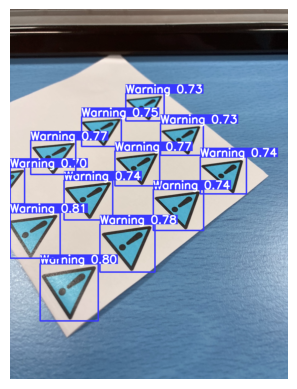

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO("/content/ultralytics/runs/detect/train/weights/best.pt")

results = model("./asd.jpg")
plots = results[0].plot()

# print(results[0])
# print(results[0].boxes)

# if results[0].boxes :
#   print("사고사고사고")

plt.imshow(plots)
plt.axis('off')  # Remove axis
plt.show()

In [ ]:
# from ultralytics import YOLO
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np

# model = YOLO("/content/ultralytics/runs/detect/train/weights/best.pt")

# video_file = "./test.mp4"

# results = model(video_file, stream = True)



In [1]:
import cv2
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("/content/ultralytics/runs/detect/train/weights/best.pt")

# Open the video file
video_path = "tEsT.mp4"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        results = model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imshow("YOLOv8 Inference", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

FileNotFoundError: [Errno 2] No such file or directory: '\\content\\ultralytics\\runs\\detect\\train\\weights\\best.pt'